# Sujet 7 : Autour du SARS-CoV-2 (Covid-19)


## Consignes :

### Prérequis

Techniques de présentation graphique. Cet exercice peut être réalisé indifféremment en R ou en Python.

### Sujet

Le but est ici de reproduire des graphes semblables à ceux du South China Morning Post (SCMP), sur la page The Coronavirus Pandemic et qui montrent pour différents pays le nombre cumulé (c'est-à-dire le nombre total de cas depuis le début de l'épidémie) de personnes atteintes de la maladie à coronavirus 2019.

Les données que nous utiliserons dans un premier temps sont compilées par le Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE) et sont mises à disposition sur GitHub. C'est plus particulièrement sur les données time_series_covid19_confirmed_global.csv (des suites chronologiques au format csv) disponibles à l'adresse : https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv, que nous allons nous concentrer.

Vous commencerez par télécharger les données pour créer un graphe montrant l’évolution du nombre de cas cumulé au cours du temps pour les pays suivants : la Belgique (Belgium), la Chine - toutes les provinces sauf Hong-Kong (China), Hong Kong (China, Hong-Kong), la France métropolitaine (France), l’Allemagne (Germany), l’Iran (Iran), l’Italie (Italy), le Japon (Japan), la Corée du Sud (Korea, South), la Hollande sans les colonies (Netherlands), le Portugal (Portugal), l’Espagne (Spain), le Royaume-Unis sans les colonies (United Kingdom), les États-Unis (US).

Le nom entre parenthèses est le nom du « pays » tel qu’il apparaît dans le fichier time_series_covid19_confirmed_global.csv. Les données de la Chine apparaissent par province et nous avons séparé Hong-Kong, non pour prendre parti dans les différences entre cette province et l'état chinois, mais parce que c'est ainsi qu'apparaissent les données sur le site du SCMP. Les données pour la France, la Hollande et le Royaume-Uni excluent les territoires d'outre-mer et autres « résidus coloniaux ».

Ensuite vous ferez un graphe avec la date en abscisse et le nombre cumulé de cas à cette date en ordonnée. Nous vous proposons de faire deux versions de ce graphe, une avec une échelle linéaire et une avec une échelle logarithmique.

### Question subsidiaire à faire quand on sera sorti du « merdier »

Vous pourrez également utiliser les données de décès (timeseriescovid19deathsglobal.csv) et refaire les courbes, mais là encore, faites attention lors de l'interprétation. Ces courbes, même si elles paraissent effrayantes, doivent être comparées à la mortalité « normale ». Pour la France des données sont disponibles sur le site de l'INSEE : https://www.insee.fr/fr/information/4470857, ainsi que dans les « Points hebdomadaires » de surveillance de la mortalité diffusés par Santé publique France, comme celui de la semaine 12 (le site étant très mal conçu pour quiconque souhaite une information spécifique, le plus simple est de passer par un moteur de recherche généraliste…).

Pour atténuer les effets dus aux méthodes de comptage, etc., vous pourrez, une fois l'épidémie terminée, prendre les données du nombre total de décès et les normaliser pour 1000 habitants du pays concerné. Vous irez ensuite chercher les données sur le nombre de lits d'hôpital pour 1000 habitants sur le site de l'OCDE et vous pourrez corréler les deux (c'est-à-dire, faire un graphe avec le nombre de lits en abscisse et le nombre de décès en ordonnée)…

---

# Pour commencer

Nous allons tout d'abord importer les outils necéssaires pour réaliser ce travail.



In [1]:
%matplotlib inline

# pour la vérification de la présence des données
import os
# pour télécharger les données
import urllib.request

# pour l'affichage des graphiques
import matplotlib.pyplot as plt
# pour le traitement des données
import pandas as pd

Nous pouvons maintenant télécharger les [données](https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv) si elles ne sont pas déjà téléchargés.

In [2]:
# URL des données
data_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"

# Nom du fichier csv
data_file = "data_covid.csv"

# Téléchargement des données si elles ne sont pas déjà présentes dans le répertoire
if not os.path.exists(data_file):
    urllib.request.urlretrieve(data_url, data_file)

# Affichage des données
raw_data = pd.read_csv(data_file)
raw_data.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20   ...    2/23/21  2/24/21  2/25/21  \
0        0        0        0        0   ...      55646    55664    55680   
1        0        0        0        0   ...     102306   103327   104313   
2        0        0        0        0   ...     112279   112461   112622   
3        0        0        0        0   ...      10739    10775    10799   
4        0        0        0        0   ...      20584    20640    20695   

   2/26/21  2/27/21  2/28/21  3/1/21  3/2/21  3/3/21  3/4/21  
0    55696    55707    55714   55733   55759   55770   55775  
1   105229   106215   107167  107931  108823  109674  110521  
2   112805   112960   113092  113255  113430  113593  113761  
3    10822    10849    10866   10889   10908   10948   10976  
4    20759    20782    20807   20854   20882   20923   20981  

[5 rows x 412 columns]

Ces données sont organisés sur 274 lignes pour chaque pays et (pour le moment) 412 colonnes présentant la province, le pays, les latitudes et longitudes suivi du nombre de cas par jour du 22 Janvier 2020 au 4 Mars 2021 au moment de l'écriture de ce rapport.

Pour vérifier qu'aucune date pour aucun pays est manquante, filtrons les données en choisant les colonnes des dates avec la regex `\d{1,2}\/\d{1,2}\/\d{2}` qui sélectionne les colonnes dont le nom commence par :
un ou deux chiffres suivi d'un "/", deux fois, puis se terminent par deux chiffres
c'est à dire les colonnes des dates (vous pouvez inverser la regex avec `[^\d{1,2}\/\d{1,2}\/\d{2}]` pour constater que la commande fait bien l'inverse et nous rend des données avec des NaN)

In [3]:
raw_data[raw_data.filter(regex="\d{1,2}\/\d{1,2}\/\d{2}").isnull().any(axis=1)]

Empty DataFrame
Columns: [Province/State, Country/Region, Lat, Long, 1/22/20, 1/23/20, 1/24/20, 1/25/20, 1/26/20, 1/27/20, 1/28/20, 1/29/20, 1/30/20, 1/31/20, 2/1/20, 2/2/20, 2/3/20, 2/4/20, 2/5/20, 2/6/20, 2/7/20, 2/8/20, 2/9/20, 2/10/20, 2/11/20, 2/12/20, 2/13/20, 2/14/20, 2/15/20, 2/16/20, 2/17/20, 2/18/20, 2/19/20, 2/20/20, 2/21/20, 2/22/20, 2/23/20, 2/24/20, 2/25/20, 2/26/20, 2/27/20, 2/28/20, 2/29/20, 3/1/20, 3/2/20, 3/3/20, 3/4/20, 3/5/20, 3/6/20, 3/7/20, 3/8/20, 3/9/20, 3/10/20, 3/11/20, 3/12/20, 3/13/20, 3/14/20, 3/15/20, 3/16/20, 3/17/20, 3/18/20, 3/19/20, 3/20/20, 3/21/20, 3/22/20, 3/23/20, 3/24/20, 3/25/20, 3/26/20, 3/27/20, 3/28/20, 3/29/20, 3/30/20, 3/31/20, 4/1/20, 4/2/20, 4/3/20, 4/4/20, 4/5/20, 4/6/20, 4/7/20, 4/8/20, 4/9/20, 4/10/20, 4/11/20, 4/12/20, 4/13/20, 4/14/20, 4/15/20, 4/16/20, 4/17/20, 4/18/20, 4/19/20, 4/20/20, 4/21/20, 4/22/20, 4/23/20, 4/24/20, 4/25/20, 4/26/20, ...]
Index: []

[0 rows x 412 columns]

Le tableau en sortie est bien vide, il ne manque donc aucune donnée sur le nombre de cas par jour.

Listons les pays que nous allons analyser, ils sont tous représentés dans les données par le nom du pays dans la colonne `Country/Region` et `Nan` dans la colonne `Province/State` sauf dans le cas de la Chine ou nous allons devoir faire une somme de toutes les provinces d'un coté et de récupérer Hong-Kong de l'autre.

In [4]:
countries = [ 
        "Belgium",
        "France",
        "Germany",
        "Iran",
        "Italy",
        "Japan",
        "Korea, South",
        "Netherlands",
        "Portugal",
        "Spain",
        "United Kingdom",
        "US",
]

Enregistrons les lignes consernées dans un nouveau tableau en ajoutant la Chine et Hong-Kong. Profitons en pour définir la localisation comme index et supprimons les colonnes inutiles et trions le tableau.

In [5]:
data_list = []
# récupération des données pour tous les pays sauf la Chine
for country in countries:
    data_list.append(raw_data[(raw_data['Province/State'].isnull()) & (raw_data['Country/Region']==country)].values.tolist()[0])
# récupération des données pour Hong-Kong
data_hk = raw_data[(raw_data['Province/State'] == "Hong Kong") & (raw_data['Country/Region']== "China")].values.tolist()[0]
data_hk[0] = pd.np.NaN
data_hk[1] = "Hong-Kong"
data_list.append(data_hk)
# récupération des données pour le reste de la Chine en sommant les différentes colonnes
data_china = raw_data[(raw_data['Province/State'] != "Hong Kong") & (raw_data['Country/Region']== "China")].sum().values.tolist()
# mise à jour des premières colonnes des données de la Chine et ajout à la liste
data_china[0] = pd.np.NaN
data_china[1] = "China"
data_list.append(data_china)
# création du nouveau tableau avec toutes les données des pays recherchés
data = pd.DataFrame(data_list, columns=raw_data.columns)
# suppression des colonnes inutilisées
data = data.drop(columns=['Province/State', 'Lat', 'Long'])
# chaangement de l'index
data = data.rename(columns={"Country/Region" : "Localisation"}).set_index("Localisation")
# création d'une colonne correspondant à la somme des cas et tri en fonction de cette colonne
data["Sum"] = data.sum(axis=1)
data = data.sort_values(by ='Sum')
data

1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  \
Localisation                                                                    
Hong-Kong             0        2        2        5        8        8        8   
Korea, South          1        1        2        2        3        4        4   
China               548      641      918     1401     2067     2869     5501   
Japan                 2        2        2        2        4        4        7   
Portugal              0        0        0        0        0        0        0   
Belgium               0        0        0        0        0        0        0   
Netherlands           0        0        0        0        0        0        0   
Iran                  0        0        0        0        0        0        0   
Germany               0        0        0        0        0        1        4   
Italy                 0        0        0        0        0        0        0   
Spain                 0        0        0        0        0        0        0   
France                0        0        2        3        3        3        4   
United Kingdom        0        0        0        0        0        0        0   
US                    1        1        2        2        5        5        5   

                1/29/20  1/30/20  1/31/20     ...       2/24/21   2/25/21  \
Localisation                                  ...                           
Hong-Kong            10       10       12     ...         10913     10926   
Korea, South          4        4       11     ...         88516     88922   
China              6077     8131     9790     ...         89919     89925   
Japan                 7       11       15     ...        427732    428816   
Portugal              0        0        0     ...        800586    801746   
Belgium               0        0        0     ...        760809    763885   
Netherlands           0        0        0     ...       1068960   1073971   
Iran                  0        0        0     ...       1598875   1607081   
Germany               4        4        5     ...       2416037   2427069   
Italy                 0        0        2     ...       2848564   2868435   
Spain                 0        0        0     ...       3170644   3180212   
France                5        5        5     ...       3639501   3664050   
United Kingdom        0        0        2     ...       4144577   4154562   
US                    6        6        8     ...      28309085  28386492   

                 2/26/21   2/27/21   2/28/21    3/1/21    3/2/21    3/3/21  \
Localisation                                                                 
Hong-Kong          10950     10983     11005     11019     11032     11046   
Korea, South       89321     89676     90031     90372     90816     91240   
China              89935     89941     89960     89971     89981     89991   
Japan             429873    431093    432090    432778    433700    434944   
Portugal          802773    803844    804562    804956    805647    806626   
Belgium           766654    769414    771511    772294    774344    777608   
Netherlands      1079084   1084021   1088690   1092452   1096433   1101430   
Iran             1615184   1623159   1631169   1639679   1648174   1656699   
Germany          2436506   2444177   2450295   2455569   2462061   2472913   
Italy            2888923   2907825   2925265   2938371   2955434   2976274   
Spain            3188553   3188553   3188553   3204531   3130184   3136321   
France           3689034   3712474   3732426   3736390   3759247   3785326   
United Kingdom   4163085   4170519   4176554   4182009   4188400   4194785   
US              28463190  28527344  28578548  28637313  28694071  28759980   

                  3/4/21         Sum  
Localisation                          
Hong-Kong          11055     1659701  
Korea, South       91638    10964482  
China              90000    33057311  
Japan             436093    41743265  
Por

Nous obtenons ainsi notre tableau avec 14 lignes contenant les informations que nous voulons afficher. Nous allons maintenant générer les graphiques.

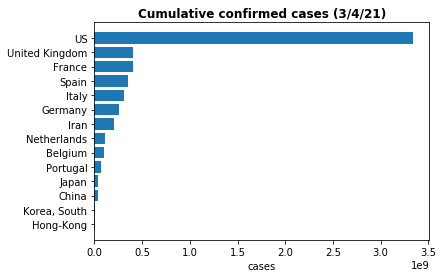

In [6]:
# récupération des valeurs à afficher
total = data["Sum"].tolist()
names = data.index.tolist()
y_pos = pd.np.arange(len(names))

# création du graphique
fig, ax = plt.subplots()
ax.barh(y_pos, total, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(names)
ax.set_xlabel('cases')
ax.set_title(f'Cumulative confirmed cases ({data.columns[-2]})' , fontweight ="bold")

plt.show()

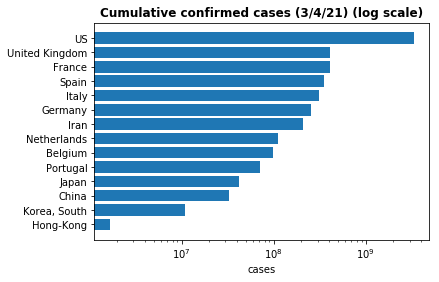

In [7]:
# création du graphique avec une échèle logarithmique
fig, ax = plt.subplots()
ax.barh(y_pos, total, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(names)
ax.set_xlabel('cases')
ax.set_title(f'Cumulative confirmed cases ({data.columns[-2]}) (log scale)' , fontweight ="bold")
plt.xscale(value="log")
plt.show()

Comme vous pouvez le constater les États Unis comptent beaucoup plus de cas que tous les autres pays, ce qui rend le premier graphe difficile à analyser. Le second nous permet de mieux nuancer les différences sur les autres pays.